<a href="https://colab.research.google.com/github/leandrorodor/ALR-Machine_Learning_AS/blob/main/regressao_linear.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

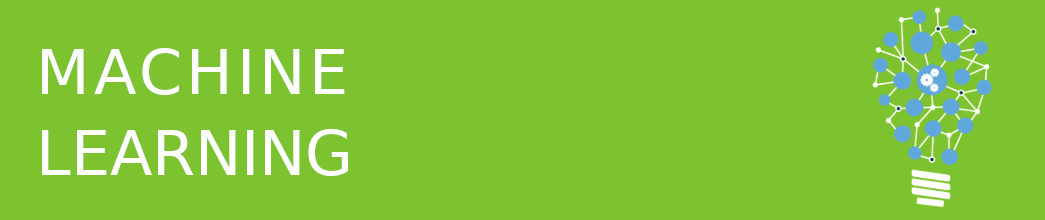

In [1]:
from IPython.display import Image
Image('/content/sample_data/banner_machine_learning.png')

## Entendendo os dados

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import numpy as np

In [ ]:
movies = pd.read_csv('/content/sample_data/rla.csv')

In [ ]:
movies.head()

,movieId,Titulo,Investimento (em milhoes),Bilheteria (pessoas)
0,1,Toy Story (1995),11.048216,5623234.602
1,2,Jumanji (1995),14.927678,5714951.757
2,3,Grumpier Old Men (1995),27.114597,9524339.124
3,4,Waiting to Exhale (1995),4.994242,6331568.779
4,5,Father of the Bride Part II (1995),19.142246,6409617.277


In [ ]:
movies.shape

(9125, 4)

In [ ]:
x = movies['Investimento (em milhoes)']

In [ ]:
y = movies['Bilheteria (pessoas)']

Text(0, 0.5, 'Bilheteria (Pessoas)')

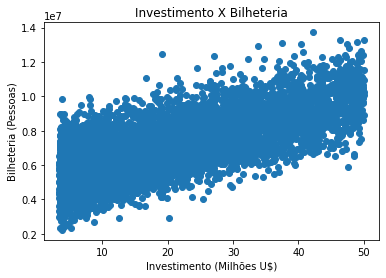

In [ ]:
plt.scatter(x,y)
plt.title('Investimento X Bilheteria')
plt.xlabel('Investimento (Milhões U$)')
plt.ylabel('Bilheteria (Pessoas)')

In [ ]:
sample = movies.sample(n=200)

In [ ]:
x = sample['Investimento (em milhoes)']

In [ ]:
y = sample['Bilheteria (pessoas)']

No handles with labels found to put in legend.


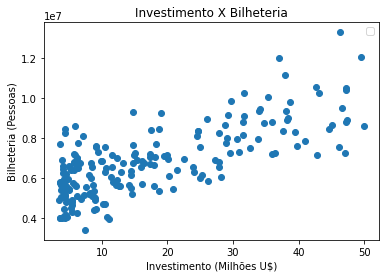

In [ ]:
plt.scatter(x,y)
plt.title('Investimento X Bilheteria')
plt.xlabel('Investimento (Milhões U$)')
plt.ylabel('Bilheteria (Pessoas)')
#plt.legend(loc='best') #colocando a legenda no melhor lugar

## Regressão linear

In [ ]:
filmes_investimento = movies['Investimento (em milhoes)']
filmes_bilheteria = movies['Bilheteria (pessoas)']

In [ ]:
type(filmes_investimento)

pandas.core.series.Series

In [ ]:
filmes_investimento.head(10)

0    11.048216
1    14.927678
2    27.114597
3     4.994242
4    19.142246
5     9.977311
6    14.257461
7     8.871800
8    29.112800
9     3.695241
Name: Investimento (em milhoes), dtype: float64

In [ ]:
filmes_bilheteria.head(10)

0    5623234.602
1    5714951.757
2    9524339.124
3    6331568.779
4    6409617.277
5    4956557.317
6    4654565.066
7    3950017.325
8    6850971.551
9    5157865.850
Name: Bilheteria (pessoas), dtype: float64

In [ ]:
treino, teste, treino_bilheteria, teste_bilheteria = train_test_split(filmes_investimento, filmes_bilheteria)

In [ ]:
print('Tamanho treino: {0} Tamanho teste: {1} Total: {2} ({0} + {1})'.format(len(treino), len(teste), len(filmes_investimento)))

Tamanho treino: 6843 Tamanho teste: 2282 Total: 9125 (6843 + 2282)


In [ ]:
print('Porcentagem treino {}'.format(len(treino)/len(filmes_investimento)))

Porcentagem treino 0.7499178082191781


In [ ]:
type(treino)

pandas.core.series.Series

In [ ]:
treino = np.array(treino).reshape(len(treino),1)

In [ ]:
type(treino)

numpy.ndarray

In [ ]:
teste = np.array(teste).reshape(len(teste),1)

In [ ]:
type(teste)

numpy.ndarray

In [ ]:
treino_bilheteria = np.array(treino_bilheteria).reshape(len(treino_bilheteria),1)
teste_bilheteria= np.array(teste_bilheteria).reshape(len(teste_bilheteria),1)

In [ ]:
modelo = LinearRegression()
modelo.fit(treino, treino_bilheteria)
modelo

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
modelo.intercept_.round(2)

array([5051816.76])

In [ ]:
modelo.coef_.round(2)

array([[98909.23]])

#### Investimento Zootopia 27.74456356

In [ ]:
orcamento_filme=27.74456356

investimento=[[orcamento_filme]]

modelo.predict(investimento)[0]

array([7796010.1353714])

In [ ]:
modelo.coef_ * 27.74456356 + modelo.intercept_

array([[7796010.1353714]])

In [ ]:
modelo.score(treino, treino_bilheteria).round(2)

0.54

In [ ]:
modelo.score(teste, teste_bilheteria).round(2)

0.53

### Testando split dos dados de treino e teste com 10%

In [ ]:
treino, teste, treino_bilheteria, teste_bilheteria = train_test_split(filmes_investimento, filmes_bilheteria, test_size=0.10)

In [ ]:
treino = np.array(treino).reshape(len(treino),1)
treino_bilheteria = np.array(treino_bilheteria).reshape(len(treino_bilheteria),1)
teste_bilheteria= np.array(teste_bilheteria).reshape(len(teste_bilheteria),1)
teste = np.array(teste).reshape(len(teste),1)

In [ ]:
modelo_10 = LinearRegression()
modelo_10.fit(treino, treino_bilheteria)
modelo_10

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

Obtendo o coeficiente de determinação (R²) do novo modelo estimado e comparando com o resultado do modelo anterior

In [ ]:
print('Modelo simples')
print('R² = {}'.format(modelo.score(treino, treino_bilheteria).round(2)))

Modelo simples
R² = 0.54


In [ ]:
modelo_10.score(teste, teste_bilheteria).round(2)

0.49